# Quickstart: SLALOM Explanations for Transformer models

This notebook contains the basic usage of the SLALOM explanation algorithm for transformer models.

We will explain a blackbox model for sentiment classification from the Huggingface hub.

In [1]:
import os 
os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2

## 1. Load a trained classification model and a tokenizer

We load a pretrained model for sequence classification on IMDB from the huggingface hub.

In [3]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained("lvwerra/distilbert-imdb")

In [4]:
tokenizer = AutoTokenizer.from_pretrained("lvwerra/distilbert-imdb")

In [5]:
# A sample from the IMDB dataset.
example_text = "This movie was so frustrating. everything seemed energetic and i was totally prepared to have a good time. \
i at least thought i\'d be able to stand it. but, i was wrong. first, the weird looping? it was like watching \" america\'s funniest home videos \". \
the damn parents. i hated them so much. the stereo - typical latino family? i need to speak with the person responsible for this. we need to have a talk. \
that little girl who was always hanging on someone? i just hated her and had to mention it. now, the final scene transcends, i must say. \
it\'s so gloriously bad and full of badness that it is a movie of its own. what crappy dancing. horrible and beautiful at once."

## 2. Initialize the explainer and explain the text

In [6]:
from slalom_explanations import SLALOMLocalExplanantions

In [7]:
slalom_explainer = SLALOMLocalExplanantions(model, tokenizer, modes=["value", "imp"], sgd_epochs=80, sgd_lr=5e-3)

In [8]:
res_explanation = slalom_explainer.tokenize_and_explain(example_text)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 182.28it/s]


The explanation that was computed contains tuples of teokens and the corresponding words.

In [9]:
res_explanation[:5]

[('this', array([ 0.51993144, -0.20311487], dtype=float32)),
 ('movie', array([0.71716255, 0.8151944 ], dtype=float32)),
 ('was', array([-0.35874662, -0.7088029 ], dtype=float32)),
 ('so', array([ 0.01479783, -0.6350392 ], dtype=float32)),
 ('frustrating', array([-0.6503646,  0.8192303], dtype=float32))]

## 3. Visualization

We use the plot function to visualize the explanation that we computed. 

In [10]:
from slalom_explanations import slalom_scatter_plot, slalom_highlight_plot

(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='value score', ylabel='importance score'>)

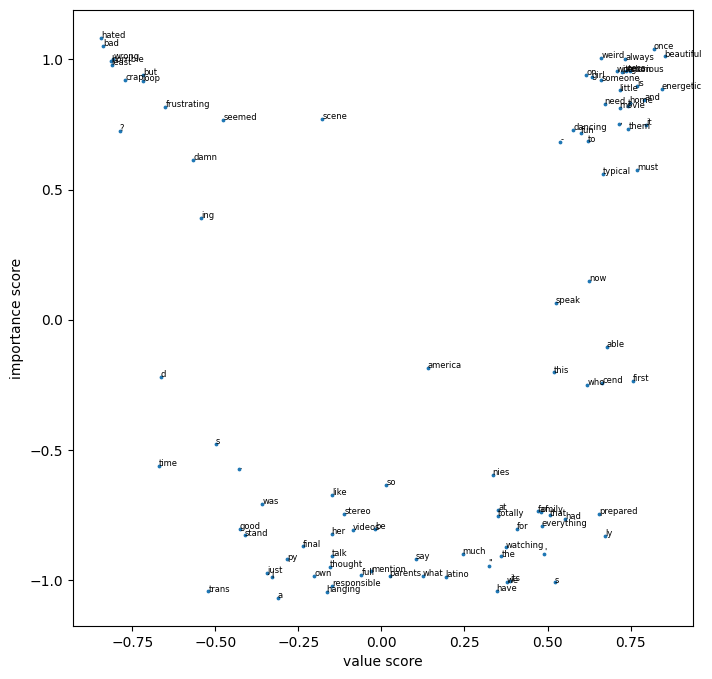

In [11]:
slalom_scatter_plot(res_explanation, sizey=8, sizex=8)

In [12]:
highlight_toks = ["fun", "bad", "crap", "horrible", "someone", "the", "beautiful", "energetic", "fun", "for", "this", "person", "family"]

(<Figure size 400x400 with 1 Axes>,
 <Axes: xlabel='value score', ylabel='importance score'>)

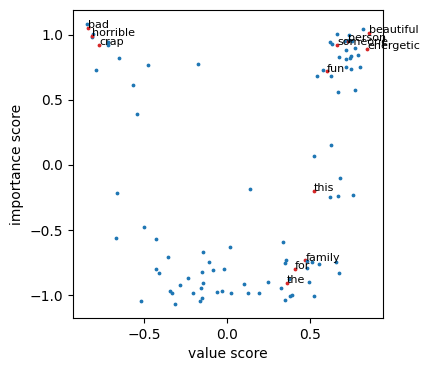

In [13]:
slalom_scatter_plot(res_explanation, sizey=4, sizex=4, highlight_toks= highlight_toks, fontsize=8)

We can also compute standard one-dimensional feature attributions from the SLALOM scores. This is known as the linearized version in the paper.

In [14]:
from slalom_explanations.slalom_helpers import linearize_explanation
linear_scores = linearize_explanation(res_explanation)

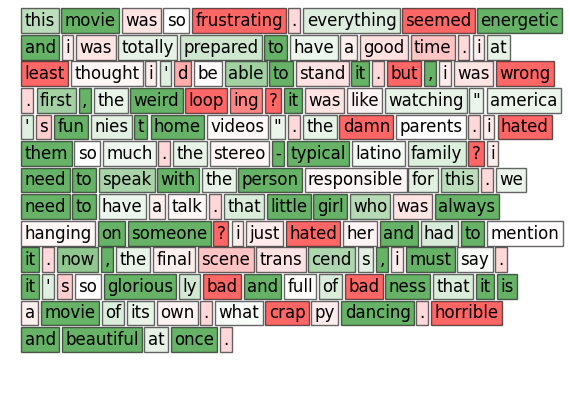

(<Figure size 700x490 with 1 Axes>, <Axes: >)

In [15]:
slalom_highlight_plot(linear_scores, vmax=1)